# Programming for Data Science
## NOVA IMS

#### Group Name/Number: <br>
1. María Fernanda Restrepo Suescún / <span style="color:blue"> Num: 20190679 <br>
2. Rennan Valadares Ornelas Araújo / <span style="color:blue"> Num: 20190146 <br>
3. Henrique Confraria Varatojo Caldas Januário / <span style="color:blue"> Num: 20190438 <br>
4. Chanmolyta Tham  / <span style="color:blue"> Num: 20190927 <br>


### Group Project Summary
This project report aims to present insights to a potential client that is willing to know where he should invest next, particularly in the tourism sector. For that purpose, our recommendations are based on the analysis of socio-economic factors that allowed us to understand the current trends on tourism and the countries that have been dominating this industry in the last years. At the end of the report we sugggest three different scenarios with which the client can choose the countries to invest depending on their return/risk position.

We used two principal datasets. The first is International Tourism by Number of Arrivals in which we can see how many people arrived per year to each country. The second dataset is the International tourism, receipts (current US$), which is the total amount of income coming from tourism to each country. Both dataset sources are the World Bank's databank.

Our group started checking the provided dataset, tried to understand the regionals and countries' perspectives and its currents status, countries made up to the top of the list as well as countries that had a remarkable growth in the past 10 years. First, we were inclined to base our study in a regional approach but then we decided to move to a country approach. 

***We used GitHub from the beginning to version control. You can check our project on the following link: https://github.com/rennanvoa2/Programming_DS_Project***

The following report presents a step-by-step process from data cleaning to data preparation, visualization and analysis.

### 1. Data Cleaning 

#### 1.1 Importing libraries

We used Scikit Learn for Machine Learning models for filling the NaNs with a regression, Pandas, and NumPy for managing data, MatPlotLib and Seaborn for plotting.

In [41]:
#remove warnings
import warnings
warnings.filterwarnings("ignore")


#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.svm import LinearSVR
import seaborn as sb

#### 1.2 Functions for Data Preparation
Following, we present the functions that we built for data preparation which help to clean data in a proper way.
##### 1.2.1 regressor_test
We started filling our NaNs with the Average of each column. Then we figured out that we could create a regressor for having better results.<br>
The main goal for the regressor_test function is to realize which of the 3 Machine Learning models is the best one for filling our NaN data. To accomplish this the regressor_test function create's 3 different regressor models ***for each column*** following these steps:<br><br>
<span style="color:blue">
1 - Split the data in Train and Test (80% and 20% respectively)<br>
2 - Create 3 different regressors: KNeighborsRegressor, LinearRegression, and LinearSVR.<br>
3 - Train each regressor with Train data.<br>
4 - Fill other columns (instead of the one in the loop) with the row average. We decided to do it because we cant have NaNs on the other columns.<br>
5 - Make the Predictions on the test set.<br>
6 - Check the Mean Squared Error for each model and append it to its list.<br>
7 - Append the best model for each column on the MSE list.<br>
8 - Count number of times of each model name appears on the list and return the highest.<br>


In [42]:
def regressor_test(complete,incomplete,years):
    '''This function test 3 diferent Machine Learning models (KNeighborsRegressor, LinearRegression, LinearSVR)
    returning the best one.
    It will return a string with the name of the best model.
    Complete: Pandas Dataset with complete data.
    Incomplete: Pandas Dataset with NaNs.
    years: List with the name of the columns'''
    kn_errors = []
    linear_errors = []
    svr_errors = []    
    
    for i in years:
        
        #Step 1
        X_train, X_test, y_train, y_test = train_test_split(complete.loc[:,complete.columns != i].values,
                                                            complete.loc[:,i].values, test_size = 0.2, random_state = 0)
        
        #Step 2
        regressor1 = KNeighborsRegressor(2, 
                                       weights ='distance', 
                                       metric = 'euclidean')
        regressor2= LinearRegression()
        regressor3=LinearSVR()
        
        #Step 3
        trained_model1 = regressor1.fit(X_train, 
                                 y_train)
        trained_model2 = regressor2.fit(X_train, 
                                 y_train)
        trained_model3 = regressor3.fit(X_train, 
                                 y_train)  
        
        #Step 4
        incomplete_2 = deepcopy(incomplete)
        incomplete_2.loc[:, incomplete.columns != i] = incomplete_2.loc[:, 
                                incomplete.columns != i].apply(lambda row: row.fillna(row.mean()), axis=1)

        #Step 5
        y_pred1 = regressor1.predict(X_test)
        y_pred2 = regressor2.predict(X_test)
        y_pred3 = regressor3.predict(X_test)
        
        #Step 6
        kn_errors.append(mean_squared_error(y_test, y_pred1))
        linear_errors.append(mean_squared_error(y_test, y_pred2))
        svr_errors.append(mean_squared_error(y_test, y_pred3))
        
        
         
    MSE= []
    
    #Step 7
    for i in range(0, len(complete.loc[:,'2007':'2017'].columns)):
        l = []
        l.extend((kn_errors[i], linear_errors[i], svr_errors[i]))
        
        if min(l) == kn_errors[i]:
            MSE.append("KNN")
        elif min(l) == linear_errors[i]:
            MSE.append("Linear")
        elif min(l) == svr_errors[i]:
            MSE.append("SVR")

    #Step 8
    print("KNN =",MSE.count("KNN"),'\nLinear =',MSE.count("Linear") ,'\nSVR =',MSE.count("SVR"))
    return max(set(MSE), key = MSE.count)


##### 1.2.2 apply_regressor
The apply_regressor function uses the string return of regressor_test function to apply the chosen model. First, we check which model was chosen on the choice variable, following for almost the same steps of regressor_test instead for the last part:<br><br>
<span style="color:blue">
1 - Check which regressor we will use and create the regressor.
2 - Split the data in Train and Test (80% and 20% respectively)<br>
3 - Train each regressor with Train data.<br>
4 - Fill other columns (instead of the one in the loop) with the row average. We decided to do it because we cant have NaNs on the other columns.<br>
5 - Make the Predictions on the test set.<br>
6 and 7 - Fill the NaNs in incomplete and pass it to the main dataset.<br>
8 - Return the dataset filled.


In [43]:
def apply_regressor(choice,complete, incomplete,dataset,years):
    ''' The main goal of apply_regressor function is to apply the model chosen on regressor_test on the dataset.
    choice: String with name of the best model.
    Complete: Pandas Dataset with complete data.
    Incomplete: Pandas Dataset with NaNs.
    dataset: The main dataset with all the data (the one you want to fill the NaNs).
    years: List with the name of the columns'''
    
    #Step 1
    for i in years:
        if choice == 'KNN':
            regressor = KNeighborsRegressor(2, 
                                            weights ='distance', 
                                            metric = 'euclidean')
        elif choice == 'SVR':
            regressor = LinearSVR()
        elif choice == 'Linear':
            regressor = LinearRegression()
        #Step 2    
        X_train, X_test, y_train, y_test = train_test_split(complete.loc[:,complete.columns != i].values,
                                                            complete.loc[:,i].values, test_size = 0.2, random_state = 0)
        #Step 3
        trained_model = regressor.fit(X_train, 
                                 y_train)
        #Step 4
        incomplete_2 = deepcopy(incomplete)
        incomplete_2.loc[:, incomplete.columns != i] = incomplete_2.loc[:, 
                                incomplete.columns != i].apply(lambda row: row.fillna(row.mean()), axis=1)
        #Step 5
        prediction = trained_model.predict(incomplete_2.loc[:,incomplete_2.columns != i])
        temp_df = pd.DataFrame(prediction.reshape(-1,1), columns = [i])
        
        #Step 6
        #now we are filling incomplete 
        for index in range(len(temp_df)):
            if np.isnan(incomplete[i][index]):
                incomplete[i][index] = temp_df[i][index]


    #Step 7
    #and filling the nan's on the main dataframe
    dataset.loc[:,'2007':'2017'] = pd.concat([complete, incomplete])
    
    #Step 8
    return dataset


##### 1.2.3 download_clean_data
This function download the dataset and metadata, merge and clean it.<br>
***Approach:***

- Load Data.
- Select Country Name, Country Code and the 11 last years (2017 is used just to check the growth from 2017 to 2018);
- Join with metadata on Country Code;
- Set Country Name as Index;
- Removing the 'Regions' (Will just use countries)
- Drop rows with more than 3 NaNs


In [44]:
def download_clean_data(data_url, metadata_url):
    ''' Download the data from the given URL, merge with metadata, drop rows with more than 3 NaNs.
    data_url: Pandas main dataset URL
    metadata_url: Pandas metadata dataset URL '''
    
    #Read the dataset CSV
    data=pd.read_csv(data_url, header=2)
    
    #Select the columns with usefull data we need 2007 here to calculate the grow from 2007 to 2008
    data=data[['Country Name', 'Country Code','2007' , '2008', '2009', '2010', '2011',
                       '2012', '2013', '2014', '2015', '2016', '2017']]
        
        #Load metadata CSV
    metadata_country=pd.read_csv(metadata_url, header=0) 
    
        #Merge data CSV with Metadata CSV
    data_df=data.merge(metadata_country, on='Country Code', how='left') 
        
        #Set Country Name as Index
    new_index = data_df['Country Name']
    data_df.set_index(new_index,inplace=True )
    
        #Create a column named Is_Country for later removing the "areas" like asia
    data_df['Is_Country'] = data_df['Region'].notnull()
    
        #Drop unnecessary columns
    data_df.drop(['Country Name', 'Unnamed: 5', 'Region', 'IncomeGroup', 'SpecialNotes',
                  'TableName'], inplace=True, axis=1)
    
        #drop the 'areas'
    data_df = data_df[data_df.Is_Country != False]
    
        #drop the Is_Country column becouse we dont need it anymore
    data_df.drop('Is_Country', inplace=True, axis=1)
    
        #drop rows with 3 or more NANs values
    data_df.dropna(thresh=(len(data_df.loc[:,'2008':'2017'].columns) - 1), inplace=True, axis=0)
    

    return data_df

#### 1.2 Get URL's
We work with provided data set indicator name: international tourism, the number of arrivals, metadata country and another indicator name: international tourism, receipts (current US$) *changed to Income in the report*, from the same the world bank databank. 

We use GitHub for sharing files, brief note and set our next goals and importing libraries for data analysis and visualization. 

In [45]:
#Define the URI from the github files (Number of Arrivels and Income)
#If you have any problem with this code, just go to https://github.com/rennanvoa2/Programming_DS_Project
#Copy the raw link from each csv file and change the strings below
income_url = 'https://raw.githubusercontent.com/rennanvoa2/Programming_DS_Project/master/Income.csv?token=AGBCKJWJQHIXYVN4UUSPPKC5ZKGIY'
arrival_url = 'https://raw.githubusercontent.com/rennanvoa2/Programming_DS_Project/master/International%20Arrivals.csv?token=AGBCKJSNMRBUHCWG5W7FRG25ZKGNC'
metadata_url = 'https://raw.githubusercontent.com/rennanvoa2/Programming_DS_Project/master/Metadata_Country.csv?token=AGBCKJSUCSZUTPS4I5AECTS5ZKGOC'

#### 1.3 Load and Clean the Data
##### 1.3.1 Apply download_clean_data function.

In [46]:
arrivals_df = download_clean_data(arrival_url,metadata_url)
income_df=download_clean_data(income_url,metadata_url)

In [47]:
#Show the first observations of each one of the data frames
arrivals_df.head()

,Country Code,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,
Aruba,ABW,772000.0,827000.0,813000.0,824000.0,869000.0,904000.0,979000.0,1072000.0,1225000.0,1102000.0,1070500.0
Angola,AGO,195000.0,294000.0,366000.0,425000.0,481000.0,528000.0,650000.0,595000.0,592000.0,397000.0,261000.0
Albania,ALB,1062000.0,1247000.0,1711000.0,2191000.0,2469000.0,3156000.0,2857000.0,3341000.0,3784000.0,4070000.0,4643000.0
Andorra,AND,2189000.0,2059000.0,1830000.0,1808000.0,2242000.0,2238000.0,2328000.0,2363000.0,2663000.0,2831000.0,NaN
Argentina,ARG,4562000.0,4700000.0,4308000.0,5325000.0,5705000.0,5587000.0,5246000.0,5931000.0,5736000.0,6655000.0,6720000.0


In [48]:
income_df.head()

,Country Code,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,
Aruba,ABW,1.213400e+09,1.352000e+09,1.223000e+09,1.254000e+09,1.358000e+09,1.412000e+09,1.506000e+09,1.625000e+09,1.664000e+09,1.632000e+09,1.733000e+09
Afghanistan,AFG,NaN,3.600000e+07,8.900000e+07,1.470000e+08,1.650000e+08,1.670000e+08,1.790000e+08,1.210000e+08,8.700000e+07,6.900000e+07,1.900000e+07
Angola,AGO,2.360000e+08,2.930000e+08,5.540000e+08,7.260000e+08,6.530000e+08,7.110000e+08,1.241000e+09,1.597000e+09,1.171000e+09,6.280000e+08,8.840000e+08
Albania,ALB,1.479000e+09,1.849000e+09,2.012000e+09,1.778000e+09,1.832000e+09,1.624000e+09,1.670000e+09,1.848000e+09,1.613000e+09,1.820000e+09,2.049000e+09
United Arab Emirates,ARE,6.072000e+09,7.162000e+09,7.352000e+09,8.577000e+09,9.204000e+09,1.092400e+10,1.238900e+10,1.522100e+10,1.748100e+10,1.949600e+10,2.104800e+10


##### 1.3.2 Get the intersection
Dif_row is a merged data frame that only has common rows of information, merged by Country Code.<br>
We used this approach because we dropped some countries from both data frames (Arrivals and Income) when removed NaNs, and after that, the data frames have different countries. We decided to use just the countries that are in both data frames.<br>
Both data frames have the same 117 observations and 11 years (2007-2017) for next stage of Data Analysis.

In [49]:
#list of the names of the columns we are going to use
years = ['2007','2008','2009','2010','2011','2012','2013','2014', '2015','2016', '2017']

#dif_row is a merged dataframe that only has common rows of information, merged by Country Code
dif_row=pd.merge(arrivals_df,income_df,on='Country Code',left_index=True)
dif_row=dif_row.drop(['Country Code'], axis=1)

#We now have the same countries on both lists
arrivals_df=dif_row.iloc[:,0:int(len(dif_row.columns)/2)]
income_df=dif_row.iloc[:,int(len(dif_row.columns)/2):]

arrivals_df.head()
#renaming columns with the correct names
arrivals_df.columns = years
income_df.columns = years


#### 1.4 Split Arrival Data
Here we split the Arrivals data frame into data_arrivals_complete (rows without NaNs) and data_arrivals_incomplete (rows with at least one NaN)


In [50]:
#preparing arrival data for regressors
data_arrivals_complete = pd.DataFrame()
data_arrivals_incomplete = arrivals_df[arrivals_df.isna().any(axis=1)]
data_arrivals_complete = arrivals_df[~arrivals_df.isna().any(axis=1)]

#### 1.5 Apply the best regressor on Arrival data frame.
We set the name of the best regressor on the variable choice (String). Then we apply this regressor with apply_regressor function and save the return data frame on arrivals_df.

In [51]:
#applying created functions
choice= regressor_test(data_arrivals_complete,data_arrivals_incomplete,years)
print('Best type of regression to be used for arrivals prediction->',choice)
arrivals_df=apply_regressor(choice,data_arrivals_complete,data_arrivals_incomplete,arrivals_df,years)

KNN = 0 
Linear = 9 
SVR = 2
Best type of regression to be used for arrivals prediction-> Linear


#### 1.6 Split Income Data
Here we split the Income data frame into data_income_complete (rows without NaNs) and data_income_incomplete (rows with at least one NaN)

In [52]:
#preparing income data for regressors
data_income_complete = pd.DataFrame()
data_income_incomplete = income_df[income_df.isna().any(axis=1)]
data_income_complete = income_df[~income_df.isna().any(axis=1)]

#### 1.7 Apply the best regressor on Income data frame..
After running the regressor_test function for the Income data frame, we realized that the regressor wasn't performing well. When we apply it, some predictions returned negative numbers. Then we decided to use the second best, which was SVR. 

In [53]:
#applying created functions
choice= regressor_test(data_income_complete,data_income_incomplete,years)
print('Best type of regression to be used for income prediction ->',choice)
income_df=apply_regressor('SVR', data_income_complete, data_income_incomplete, income_df, years)

KNN = 1 
Linear = 6 
SVR = 4
Best type of regression to be used for income prediction -> Linear


### 2. Data Preparation
#### 2.1 common_fm

The goal for this function is to create commom features in both datasets. We are using 4 commom features: 
- Avarage in 10 years(Avg_10_Years) - Mean of the row;
- %Avarage(%Avg) - divide each value of Avarage in 10 years for the sum of the column;
- Growth in 10 Years(Growth10ys)  - (Data from 2017 - data from 2008) / data from 2008;
- %Growth(% growth) - Divide each value of Growth in 10 years for the sum of the column.

In [54]:
def common_fm(data_df):
    ''' This function create features on the given dataset. 
    Features created: Avarage in 10 years(Avg_10_Years), Growth in 10 Years(Growth10ys), %Growth(% growth) and %Avarage(%Avg).
    data_df: Pandas Dataset'''
        #create feature Avarage in Last 10 Years
    data_df['Avg_10_Years'] = data_df.loc[:,'2008':'2017'].mean(axis=1)
    
        #Create the feature Growth in 10 years
    data_df['Growth10ys']=(data_df['2017']/data_df['2008']-1)
    
    
    annual_growth = pd.DataFrame(index=data_df.index.values)
    
        #Fill the growth of each year in annual_arrival_growth dataframe
    for i in arrivals_df.loc[:,'2008':'2017'].columns:
        annual_growth[i] = (data_df[i] - data_df[str(int(i)-1)]) / data_df[str(int(i)-1)]
       
        #New Growth metric, becouse the last one wasnt good.
    data_df["AVG_Growth"] =  annual_growth.mean(axis=1)
    
        #sort by the best avarage arrivals in the last 10 years
    data_df = data_df.sort_values('Avg_10_Years', ascending =False)

        #divide each value of Growth in 10 years for the sum of the column
    data_df['% growth'] = data_df['AVG_Growth'] / data_df['AVG_Growth'].sum()

        #divide each value of Avarage in 10 years for the sum of the column
    data_df['%Avg'] = data_df['Avg_10_Years'] / data_df['Avg_10_Years'].sum()


    return data_df

#### 2.2 Creating the new metrics
We started by giving the same weigh for growth metrics and total number metrics, but the result showed the countries with higher growth in the last 10 years dominated the top 10 countries despite the number of the total number. Then we decided to give more weight to the total number. It makes sense to balance both features, but the total number should count more than growth for a safe result.
We also created the feature AVG_expenditure_per_person, which was made dividing Average 10 years (income) for Average 10 years (arrivals), then we used this metric to create %Avg_Per_Person dividing each value for column total.
On our last step, we create Growth x Average x Avg Exp feature, which balances %Growth, %Avarage and %Avg Exp Feature based on the wight's chosen.

In [55]:
#Weigh's for metrics
arrivals_total_number_weight = 3
arrivals_growth_weight = 1
income_total_number_weight = 3
income_growth_weight = 1
avg_per_person_weight = 1


#for arrivals

arrivals_df = common_fm(arrivals_df)

#Calculate the avarage between Growth and Avarage Numbers of Arrivals
arrivals_df['Growth x Average'] = (arrivals_growth_weight * arrivals_df['% growth'] +
               (arrivals_total_number_weight * arrivals_df['%Avg'])) / (arrivals_total_number_weight + arrivals_growth_weight)

#create a dataframe sorted by Growth X Avarage
Arrivals_in_growth_vs_arrivals = arrivals_df.sort_values('Growth x Average', ascending=False)


#for income

income_df = common_fm(income_df)

#Create Avarage expenditure per person
income_df['AVG_expenditure_per_person'] = income_df['Avg_10_Years'] / arrivals_df['Avg_10_Years']


#divide each value of Avarage per person for the sum of the column
income_df['%Avg_Per_Person'] = income_df['AVG_expenditure_per_person'] / income_df['AVG_expenditure_per_person'].sum()

#Calculate the avarage between Growth and Avarage Numbers of Arrivals
income_df['Growth x Average x Avg Exp'] = (income_growth_weight * income_df['% growth'] +
               (income_total_number_weight* income_df['%Avg']) + 
               avg_per_person_weight * income_df['%Avg_Per_Person']) / (income_total_number_weight + 
                                                income_growth_weight + avg_per_person_weight)

#create a dataframe sorted by Growth X Avarage
income_in_growth_vs_income = income_df.sort_values('Growth x Average x Avg Exp', ascending=False)

#### 2.3 Drop Outliers
We didn't want to drop many outliers, but Belarus and Congo was biasing our data. No matter what weight we chose for total number, Belarus and Congo were always listed. When we check their growth on the dataframe the difference between them and the others was too big, raising a red flag. Checking the metadata we realized that data before 2015 were adjusted to reflect the new denomination effective from July 1, thats why we decided to drop it.


In [56]:
#Drop Belarus, its an outlier in Arrivals Dataset
Arrivals_in_growth_vs_arrivals = Arrivals_in_growth_vs_arrivals.drop(['Belarus'])

#Drop Congo, its an outlier in income Dataset
income_in_growth_vs_income = income_in_growth_vs_income.drop(['Congo, Dem. Rep.'])

#### 2.3 Pick the top 10 of each data frame
Using the Arrivals_in_growth_vs_arrivals and income_in_growth_vs_income features we selected the top 10 countries.

In [57]:
#get the best 10 results in Arrivals
arrival_top_10 = Arrivals_in_growth_vs_arrivals.iloc[0:10,:]

#get the best 10 results in income
income_top_10 = income_in_growth_vs_income.iloc[0:10,:]

In [58]:
#show the head of each one of the tables for better understanding
arrival_top_10.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Avg_10_Years,Growth10ys,AVG_Growth,% growth,%Avg,Growth x Average
Country Name,,,,,,,,,,,,,,,,,
France,80853000.0,79218000.0,76764000.0,76647000.0,80499000.0,81980000.0,83634000.0,83701000.0,84452000.0,82682000.0,86861000.0,81643800.0,0.096481,0.007546,0.000379,0.077803,0.058447
United States,56135000.0,58007000.0,55103000.0,60010000.0,62821000.0,66657000.0,69995000.0,75022000.0,77774000.0,76407000.0,76941000.0,67873700.0,0.326409,0.032823,0.001649,0.064680,0.048923
Spain,58666000.0,57192000.0,52178000.0,52677000.0,56177000.0,57464000.0,60675000.0,64939000.0,68175000.0,75315000.0,81786000.0,62657800.0,0.430025,0.035276,0.001772,0.059710,0.045225
China,54720000.0,53049000.0,50875000.0,55664000.0,57581000.0,57725000.0,55686000.0,55622000.0,56886000.0,59270000.0,60740000.0,56309800.0,0.144979,0.011252,0.000565,0.053661,0.040387
Italy,43654000.0,42734000.0,43239000.0,43626000.0,46119000.0,46360000.0,47704000.0,48576000.0,50732000.0,52372000.0,58253000.0,47971500.0,0.363153,0.029834,0.001499,0.045715,0.034661


In [59]:
income_top_10.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Avg_10_Years,Growth10ys,AVG_Growth,% growth,%Avg,AVG_expenditure_per_person,%Avg_Per_Person,Growth x Average x Avg Exp
Country Name,,,,,,,,,,,,,,,,,,,
United States,1.442230e+11,1.647210e+11,1.460020e+11,1.679960e+11,1.876290e+11,2.009970e+11,2.184960e+11,2.359900e+11,2.491830e+11,2.461720e+11,2.513610e+11,2.068547e+11,0.525980,0.059927,0.002512,0.165916,3047.641428,0.014825,0.103017
France,6.390200e+10,6.800100e+10,5.885800e+10,5.618700e+10,6.608700e+10,6.400000e+10,6.606000e+10,6.738200e+10,6.641900e+10,6.296500e+10,6.989400e+10,6.458530e+10,0.027838,0.012488,0.000523,0.051803,791.061905,0.003848,0.031956
Spain,5.991000e+10,6.442200e+10,5.574800e+10,5.430500e+10,6.244700e+10,5.787700e+10,6.258400e+10,6.509900e+10,5.653200e+10,6.060500e+10,6.843700e+10,6.080560e+10,0.062323,0.018273,0.000766,0.048772,970.439435,0.004721,0.030360
Germany,4.933200e+10,5.339700e+10,4.746200e+10,4.912600e+10,5.343100e+10,5.164500e+10,5.548600e+10,5.870100e+10,5.065200e+10,5.217500e+10,5.617300e+10,5.282480e+10,0.051988,0.016241,0.000681,0.042370,1719.081634,0.008362,0.027231
United Kingdom,5.134500e+10,4.862100e+10,3.904400e+10,4.052600e+10,4.685600e+10,5.250800e+10,5.636800e+10,6.303500e+10,6.545400e+10,6.189400e+10,5.147400e+10,5.257800e+10,0.058678,0.007218,0.000303,0.042172,1659.653852,0.008073,0.026978


### 3. Data Analysis and Visualization

Using Seaborn library we built the next bar charts showing the top countries with the biggest growth in arrivals, Income and a combination of both measures. At the end of the section, we analyze these charts and suggest some scenarios of investment for our client.
#### 3.1 Arrivals top 10 Bar Chart

This Bar Chart shows the 10 countries with the biggest average growth in Arrivals 

Text(0.5, 1.0, 'Growth in Arrivals')

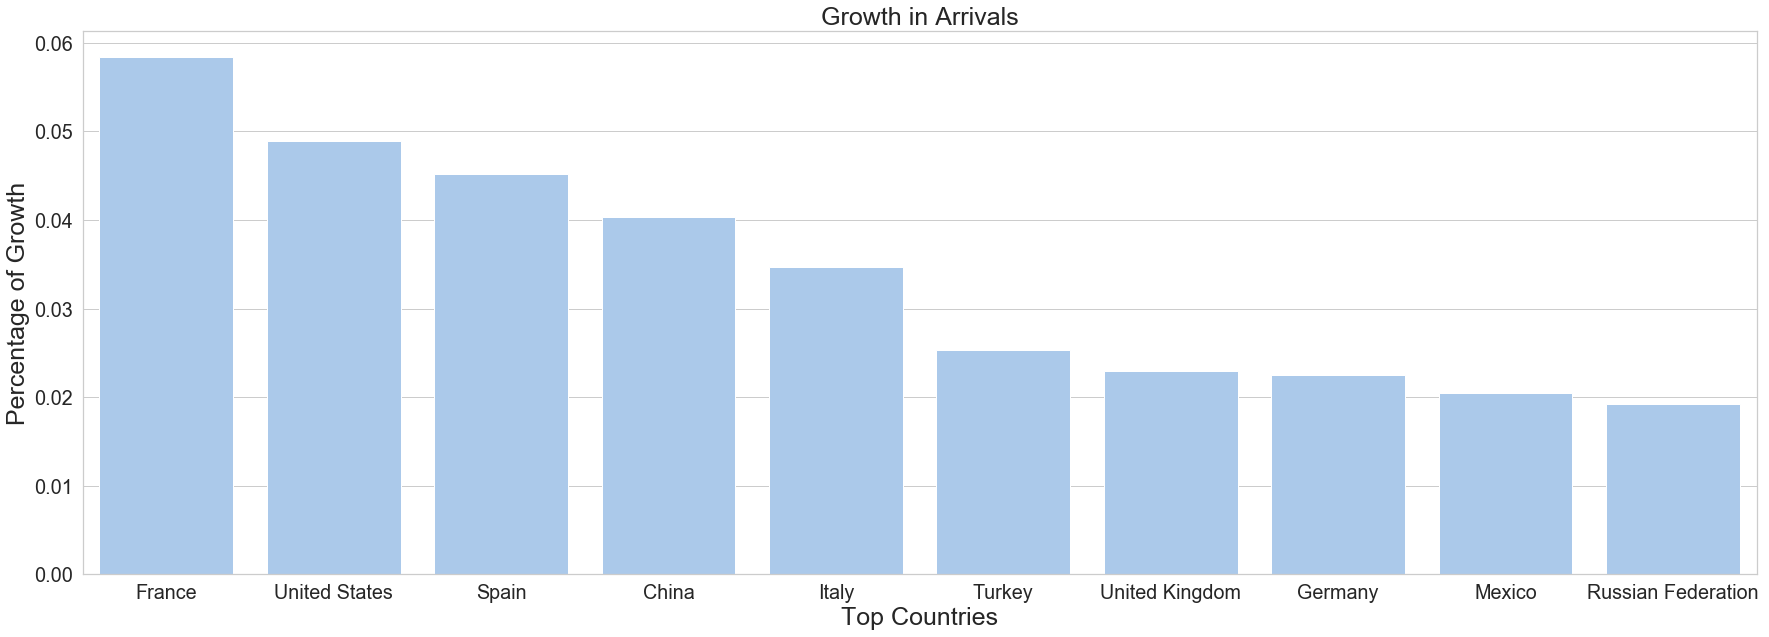

In [60]:
# Set some initial parameters of the graph
plt.rcParams['figure.figsize'] = (30, 10)
sb.set(style="whitegrid", font_scale=1.8)

# Plot the Arrivals values
sb.set_color_codes("pastel")
sb.barplot(y= arrival_top_10['Growth x Average'] , x = arrival_top_10.index.values, data = arrival_top_10, color='b')

# Name the x axis and set its fontsize
plt.xlabel('Top Countries', fontsize=25) 

# Name the y axis and set its fontsize
plt.ylabel('Percentage of Growth', fontsize=25) 
  
# Give a title and set its fontsize
plt.title("Growth in Arrivals", fontsize=25) 

#### 3.2 Income top 10 Bar Chart

This Bar Chart shows the 10 countries with the biggest average growth in Income

Text(0.5, 1.0, 'Growth in Income')

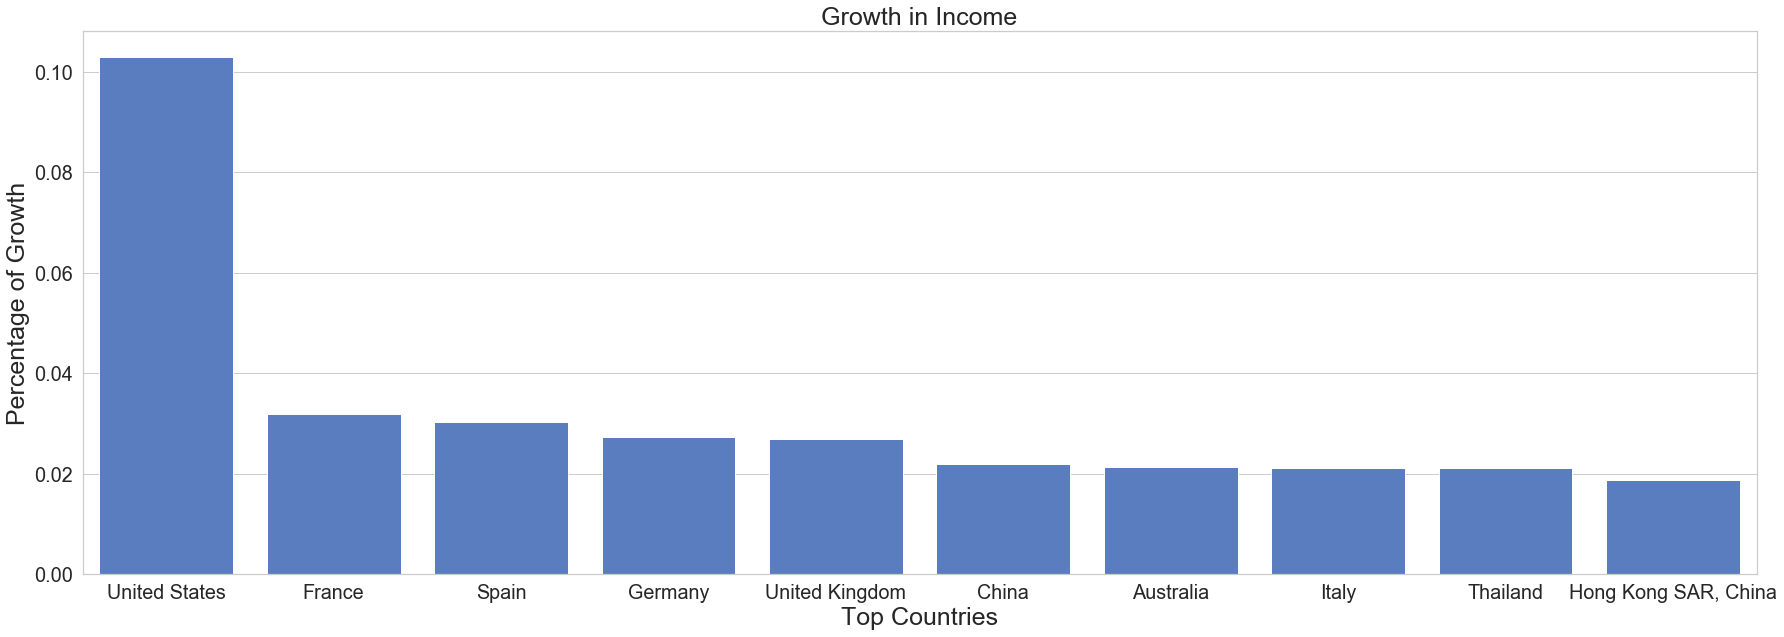

In [61]:
# Set some initial parameters of the graph
plt.rcParams['figure.figsize'] = (30, 10)
sb.set(style="whitegrid", font_scale=1.8)

# Plot the Income values
sb.set_color_codes("muted")
sb.barplot(y= income_top_10['Growth x Average x Avg Exp'] , x = income_top_10.index.values, data = income_top_10, color='b')

# Name the x axis and set its fontsize
plt.xlabel('Top Countries', fontsize=25) 

# Name the y axis and set its fontsize
plt.ylabel('Percentage of Growth', fontsize=25) 
  
# Give a title and set its fontsize
plt.title("Growth in Income", fontsize=25) 

#### 3.3 Growth in Income and Arrivals Bar Chart

This graph is the combination of both Bar Charts above and shows the countries with the biggest growth in arrivals and income in the last years.

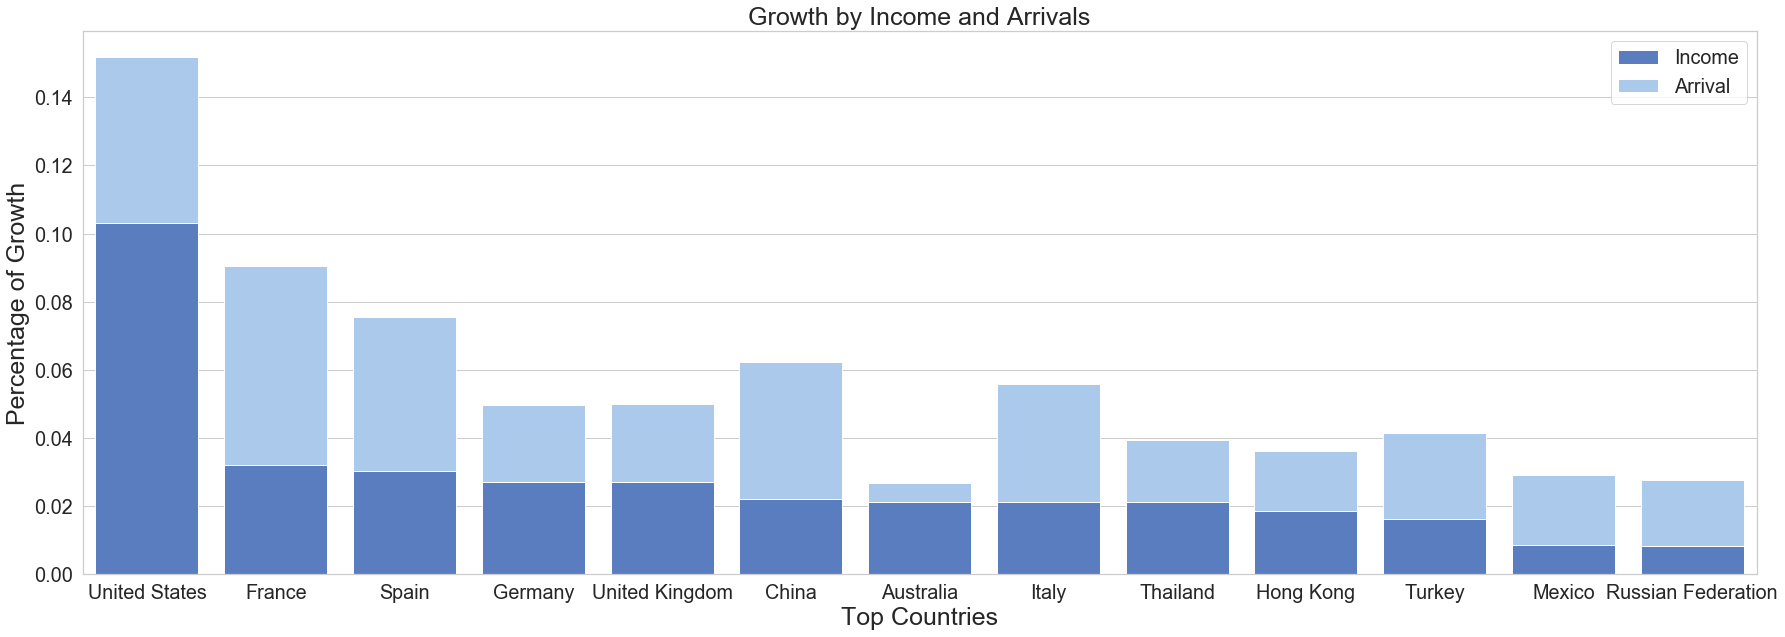

In [62]:
# Create a list with unique countries in arrival_top_10 + income_top_10
label_array = list(set(list(arrival_top_10.index.values)+ list(income_top_10.index.values)))

# Create a dataframe with the sum of top arrivals + top income
Arrivals_plus_income = pd.DataFrame(index=label_array)
Arrivals_plus_income['Arrivals GxA'] = arrivals_df['Growth x Average']
Arrivals_plus_income['Income GxA'] = income_df['Growth x Average x Avg Exp']

# Sort the DataFrame by income
Arrivals_plus_income = Arrivals_plus_income.sort_values('Income GxA', ascending =False)

# Rename the index "Hong Kong SAR, China for graphic purpose" 
Arrivals_plus_income = Arrivals_plus_income.rename(index={'Hong Kong SAR, China': 'Hong Kong'})

# Set some initial parameters of the graph
plt.rcParams['figure.figsize'] = (30, 10)
sb.set(style="whitegrid", font_scale=1.8)

# Plot the Income values
sb.set_color_codes("muted")
sb.barplot(y=Arrivals_plus_income['Income GxA'], x = Arrivals_plus_income.index.values, data = Arrivals_plus_income, color='b', label='Income')

# Plot the Arrivals values
sb.set_color_codes("pastel")
sb.barplot(y= Arrivals_plus_income['Arrivals GxA'] , x = Arrivals_plus_income.index.values, data = Arrivals_plus_income, color='b', bottom=Arrivals_plus_income['Income GxA'], label='Arrival')

# Name the x axis and set its fontsize
plt.xlabel('Top Countries', fontsize=25) 

# Name the y axis and set its fontsize
plt.ylabel('Percentage of Growth', fontsize=25) 
  
# Give a title and set its fontsize
plt.title("Growth by Income and Arrivals", fontsize=25) 

# Add the legend
plt.legend()

#### 3.4 Data Analysis and Suggestions

The graphs above, show the countries with the biggest growth in arrivals and income related to tourism. Within these countries, are the ones in which we suggest our client to invest. All of these countries are well known and most of them have policies that allow investment in tourism. 

We suggest some scenarios with which the client can choose the countries to invest depending on their return/risk position.

<b>Scenario 1 (low risk, low income): Invest only in the United States</b>

The United States has had the biggest growth in the number of arrivals and income coming from tourism. This country has a very tempting market with open policies towards investment. However, precisely because of its great opening to the investment, this is a very competitive market in which the income is not going to be the best but at least the risk is going to be minimum.

<b>Scenario 2 (high risk, high income): Invest in China</b>

This scenario is the opposite of the first one. China is a country very protectionist with his national companies and is a very hard market to enter. However, once inside the market, it is possible that there are not many other international companies competing. This is a very risky scenario taking into account that the principal competitor is the Chinese state itself, but the income obtained here must be very good, analyzing the trends of growth in tourism in China.

<b>Scenario 3 (medium risk, medium income): Invest in Europe (France, Spain, Germany, United Kingdom, Italy)</b>

In this last scenario, we suggest a moderate investment. Europe is also a very competitive market and is also very open to investment. However, as there are many countries of the same region and with similar policies, the risk and the income could be well distributed between them. The fact that the countries are very close between them is an advantage in terms of logistics and administration issues and maybe this condition could contribute to minimizing the costs. These five countries are very traditional and always the first choice for tourism.